In [152]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras import backend as K

from keras.datasets import imdb
from keras.datasets import reuters
from keras.datasets import boston_housing

# plt for Plots
import matplotlib.pyplot as plt
import numpy as np
import copy


In [151]:
keras.__version__

'2.4.3'

#  Assignment 5.1 -Binary classification example Classifying movie reviews: a  binary classification example

## Importing IMDB dataset

"IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews

In [94]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Train_data and test_data are lists of reviews, each review being a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive"

In [95]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [96]:
train_labels[0]

1

In [97]:
max([max(sequence) for sequence in train_data])

9999

###  Getting 5 Reviews

In [98]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [99]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Data Preparation

In [100]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [101]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [102]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Network model

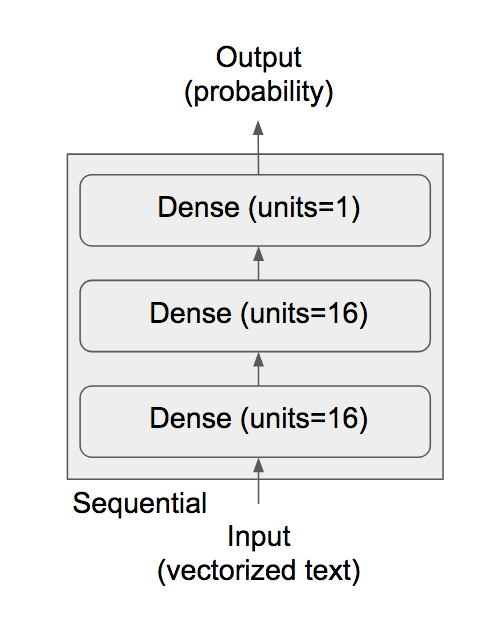

In [103]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [104]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [105]:


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [106]:


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validation

In [107]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [108]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5349 - binary_accuracy: 0.7831 - val_loss: 0.4311 - val_binary_accuracy: 0.8313
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3307 - binary_accuracy: 0.8979 - val_loss: 0.3266 - val_binary_accuracy: 0.8757
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2343 - binary_accuracy: 0.9276 - val_loss: 0.2822 - val_binary_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1834 - binary_accuracy: 0.9419 - val_loss: 0.2824 - val_binary_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1472 - binary_accuracy: 0.9538 - val_loss: 0.2862 - val_binary_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1211 - binary_accuracy: 0.9626 - val_loss: 0.3039 - val_binary_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - los

In [109]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

###  Training Vs Losses Plots

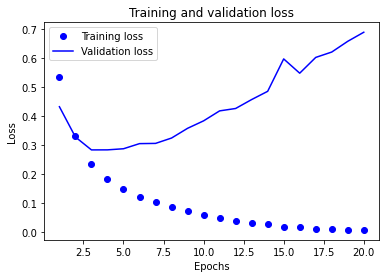

In [110]:

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

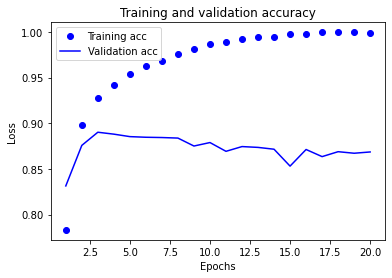

In [111]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

##  Results

In [112]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4526 - accuracy: 0.8235
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2586 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1986 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8661


In [113]:
results

[0.3382887840270996, 0.8660799860954285]

#### The accuracy of is arround 87%

#### New Data Predictions

In [29]:
model.predict(x_test)

array([[0.16211462],
       [0.9981967 ],
       [0.72439635],
       ...,
       [0.08467323],
       [0.05472603],
       [0.3576886 ]], dtype=float32)

# Assignment 5.2 - Classifying newswires

### Importing Reuters dataset & verifying the data/metadata

In [114]:

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [115]:
len(train_data)

8982

In [116]:
#train_data

In [117]:
len(test_data)

2246

In [118]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### decode words

In [119]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [120]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [121]:
train_labels[10]

3

#### Data Preparation

In [123]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [124]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [125]:


one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [126]:


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [127]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validation

In [128]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [129]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 20ms/step - loss: 2.5756 - accuracy: 0.5624 - val_loss: 1.7051 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4065 - accuracy: 0.7007 - val_loss: 1.3263 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0543 - accuracy: 0.7709 - val_loss: 1.1226 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8279 - accuracy: 0.8256 - val_loss: 1.0205 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6566 - accuracy: 0.8617 - val_loss: 0.9526 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5287 - accuracy: 0.8835 - val_loss: 0.9880 - val_accuracy: 0.7820
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4297 - accuracy: 0.9055 - val_loss: 0.8869 - val_accuracy: 0.8110
Epoch 8/20
16

In [130]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

###  Loss Vs accuracy Plots

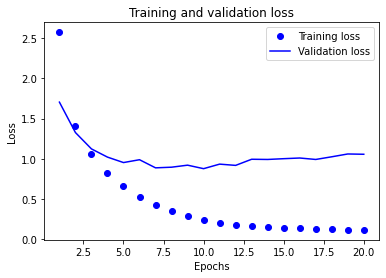

In [131]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

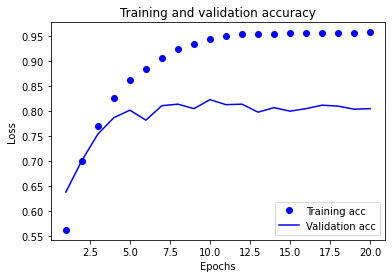

In [132]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [133]:

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 0s 19ms/step - loss: 2.5399 - accuracy: 0.5228 - val_loss: 1.7099 - val_accuracy: 0.6360
Epoch 2/8
16/16 [==============================] - 0s 15ms/step - loss: 1.3935 - accuracy: 0.7097 - val_loss: 1.2941 - val_accuracy: 0.7180
Epoch 3/8
16/16 [==============================] - 0s 14ms/step - loss: 1.0398 - accuracy: 0.7824 - val_loss: 1.1322 - val_accuracy: 0.7560
Epoch 4/8
16/16 [==============================] - 0s 14ms/step - loss: 0.8230 - accuracy: 0.8257 - val_loss: 1.0325 - val_accuracy: 0.7740
Epoch 5/8
16/16 [==============================] - 0s 16ms/step - loss: 0.6600 - accuracy: 0.8603 - val_loss: 0.9759 - val_accuracy: 0.7890
Epoch 6/8
16/16 [==============================] - 0s 15ms/step - loss: 0.5270 - accuracy: 0.8876 - val_loss: 0.9271 - val_accuracy: 0.8110
Epoch 7/8
16/16 [==============================] - 0s 15ms/step - loss: 0.4268 - accuracy: 0.9090 - val_loss: 0.8971 - val_accuracy: 0.8090
Epoch 8/8
71/71 [===

### Results

In [134]:
results

[0.9881256818771362, 0.7791629433631897]

### The Model accuracy is 78%

In [135]:

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18432769367764915

### New Data predictions

In [136]:
predictions = model.predict(x_test)

In [137]:
predictions[0].shape

(46,)

In [138]:
np.sum(predictions[0])

1.0000001

In [139]:
np.argmax(predictions[0])

3

In [140]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [141]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [142]:

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 0s 8ms/step - loss: 2.9902 - accuracy: 0.3262 - val_loss: 2.2384 - val_accuracy: 0.6040
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7220 - accuracy: 0.6387 - val_loss: 1.5357 - val_accuracy: 0.6610
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2732 - accuracy: 0.6887 - val_loss: 1.3748 - val_accuracy: 0.6720
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0959 - accuracy: 0.7236 - val_loss: 1.3138 - val_accuracy: 0.6960
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9817 - accuracy: 0.7600 - val_loss: 1.2926 - val_accuracy: 0.7080
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8901 - accuracy: 0.7823 - val_loss: 1.2716 - val_accuracy: 0.7230
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8146 - accuracy: 0.8028 - val_loss: 1.2797 - val_accuracy: 0.7220
Epoch 8/20
63/63 [==

###  The Peak Accuracy is 71%. when compare to other model accuracy 8% drop

#  Assignment : 5.3 - Predicting House Prices

###  Importing Boston Housing Data

In [143]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [144]:
train_data.shape

(404, 13)

In [145]:
test_data.shape

(102, 13)

In [146]:

train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Data Preparation

In [147]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [148]:



def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

###  Data Validation

In [149]:

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [150]:
all_scores

[2.2447338104248047,
 2.8175580501556396,
 2.5621373653411865,
 2.6533560752868652]

In [68]:
np.mean(all_scores)

2.5239901542663574

In [80]:
# Some memory clean-up
K.clear_session()

In [81]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [86]:

# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 16.2258 - mae: 2.5889


###  Test Results

In [87]:
test_mae_score

2.5888874530792236